In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import pyaudio
import wave

do_rec = input("Test by recording sound [y/n]: ")

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 8000
CHUNK = 1024
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "file.wav"

if do_rec.lower() == 'y':
    audio = pyaudio.PyAudio()

    # start Recording
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)
    print ("recording...")
    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print ("finished recording")


    # stop Recording
    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

Test by recording sound [y/n]: n


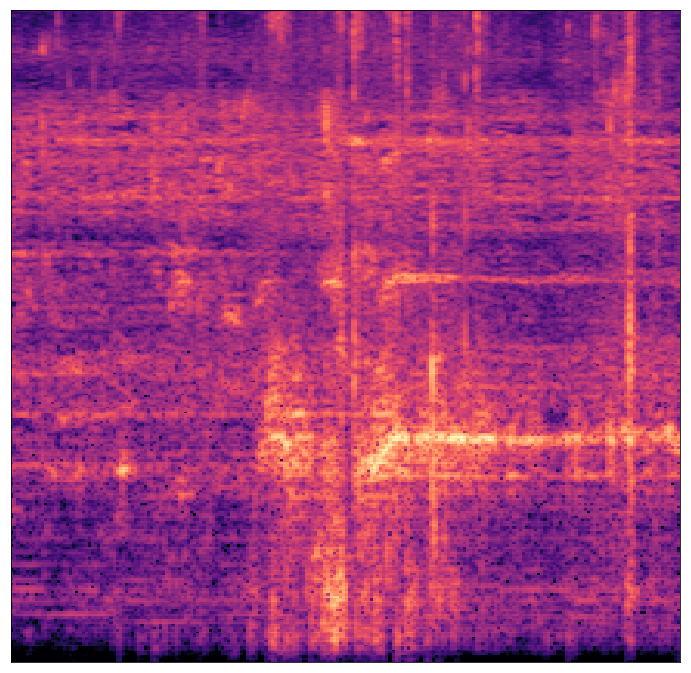

In [4]:
import os
import librosa
import librosa.display
import librosa.feature

IMG_EXT = ".png"

directory = "../test_audio/"

# X = np.array()
count = 1
plt.figure(figsize=(12, 12))
# for filename in os.listdir(directory):
    
# #     if count < 4:
# #         count += 1
 
#     path = os.path.join(directory, filename)
#     y, sr = librosa.load(path)
#     S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=400, fmax=4000)
# #         librosa.display.specshow(librosa.logamplitude(S,ref_power=np.max),
# #                                  y_axis='mel', fmax=4000, x_axis='time')
#     librosa.display.specshow(librosa.logamplitude(S,ref_power=np.max),
#                             fmax=4000)
#     output_filename = "./test_spectrograms/spec_" + filename[:-4] + IMG_EXT
#     plt.savefig(output_filename)
    
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel spectrogram')
# plt.tight_layout()

# if inputs[2]=='full':
#     print (specgramOr)
#     numpy.save(fileName.replace('.png','')+'_spectrogram', specgramOr)
# else:
#     #specgram = scipy.misc.imresize(specgramOr, float(227.0) / float(specgramOr.shape[0]), interp='bilinear')                        
#     specgram = cv2.resize(specgramOr,(227, 227), interpolation = cv2.INTER_LINEAR)
#     im1 = Image.fromarray(numpy.uint8(matplotlib.cm.jet(specgram)*255))
#     scipy.misc.imsave(fileName, im1)
filename = "noise_10.wav"
path = os.path.join(directory, filename)
y, sr = librosa.load(path)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=400, fmax=6000)
#         librosa.display.specshow(librosa.logamplitude(S,ref_power=np.max),
#                                  y_axis='mel', fmax=4000, x_axis='time')
librosa.display.specshow(librosa.logamplitude(S,ref_power=np.max),
                        fmax=6000)
output_filename = "../test_spectrograms/_spec_" + filename[:-4] + IMG_EXT
plt.savefig(output_filename)

# print(y, sr)